In [1]:
#Loading the dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
irisdf = pd.DataFrame(iris.data, columns = iris.feature_names)
irisdf.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


C:\Users\GROUPHEADCV\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\GROUPHEADCV\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\GROUPHEADCV\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\GROUPHEADCV\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have

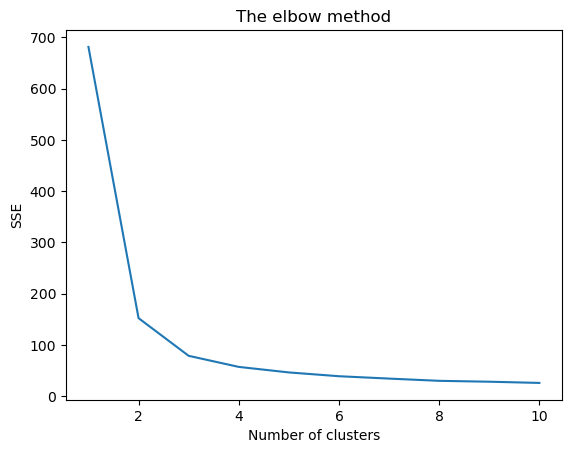

In [2]:
#Using the elbow method to determine the optimal number of clusters
x = irisdf.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
sse=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    sse.append(km.inertia_)
    
plt.plot(range(1, 11), sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [3]:
#Clustering the dataset and displaying it
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
ykmeans = kmeans.fit_predict(x)
irisdf['Clusters']=ykmeans
print(irisdf)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Clusters  
0          

C:\Users\GROUPHEADCV\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


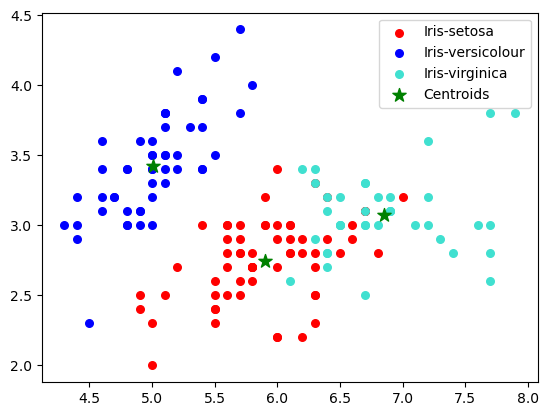

In [4]:
#the visualization of the clusters
plt.scatter(x[ykmeans == 0, 0], x[ykmeans == 0, 1], 
            s = 30, c = 'red', label = 'Group 3')
plt.scatter(x[ykmeans == 1, 0], x[ykmeans == 1, 1], 
            s = 30, c = 'blue', label = 'Group 2')
plt.scatter(x[ykmeans == 2, 0], x[ykmeans == 2, 1],
            s = 30, c = 'turquoise', label = 'Group 1')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids', marker = '*')

plt.legend()